## 第108讲 应用Transfer Learning和Vgg 16识别厨房刀具


## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

In [27]:
#https://www.kaggle.com/c/dogs-vs-cats/data
#http://kt.agh.edu.pl/~matiolanski/KnivesImagesDatabase/

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it. It was used to win the ILSVR (ImageNet) competition in 2014

Transfer learning generally refers to a process where a model trained on one problem is used in some way on a second related problem.

In [28]:
import tensorflow as tf
tf.__version__

'2.3.0'

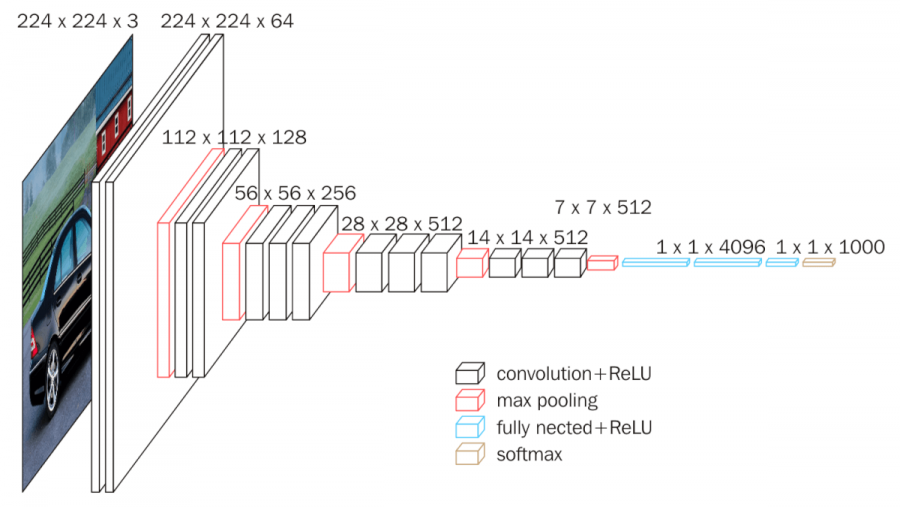

In [29]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson69-vgg16-1.png')

In [1]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import glob
import matplotlib.pyplot as plt

from os.path import isfile, isdir, getsize
import shutil
from os import mkdir, makedirs, remove, listdir

In [3]:
datasetfolderpath = r"D:\python\Project0-Python-MachineLearning\Lesson108-knife\KnivesImagesDatabase"
files = glob.glob(datasetfolderpath + "/**/*.bmp")

labels = np.array([0]*9340 + [1]*3559)

In [5]:
files

['D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_ALL\\10000.bmp',
 'D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_ALL\\10001.bmp',
 'D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_ALL\\10002.bmp',
 'D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_ALL\\10003.bmp',
 'D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_ALL\\10004.bmp',
 'D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_ALL\\10005.bmp',
 'D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_ALL\\10006.bmp',
 'D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_ALL\\10007.bmp',
 'D:\\python\\Project0-Python-MachineLearning\\Lesson108-knife\\KnivesImagesDatabase\\NEGATIVES_

In [6]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
len(files)

12899

In [8]:
len(labels)

12899

In [35]:
len_data = len(files)
train_examples = 8000
test_examples = len_data - train_examples

permutation = np.random.permutation(len_data)
train_set = [files[i] for i in permutation[:train_examples]]
test_set = [files[i] for i in permutation[-test_examples:]]
train_labels = labels[permutation[:train_examples]]
test_labels = labels[permutation[-test_examples:]]

train_folder = datasetfolderpath + '/train'
test_folder = datasetfolderpath + '/test'

if isdir(train_folder):
    shutil.rmtree(train_folder)
if isdir(test_folder):
    shutil.rmtree(test_folder)
    
makedirs(train_folder + '/positive/')
makedirs(train_folder + '/negative/')
makedirs(test_folder + '/positive/')
makedirs(test_folder + '/negative/')

for f,i in zip(train_set, train_labels):
    if i == 1: 
        shutil.copy2(f, train_folder+'/positive/')
    else:
        shutil.copy2(f, train_folder+'/negative/')

for f,i in zip(test_set, test_labels):
    if i == 1: 
        shutil.copy2(f, test_folder+'/positive/')
    else:
        shutil.copy2(f, test_folder+'/negative/')

In [36]:
# re-size all the images to this
IMAGE_SIZE = [100, 100]

#Keras generator alway looks for subfolders (representing the classes). Images insight the subfolders are associated with a class

train_path = 'D:/python/Project0-Python-MachineLearning/Lesson108-knife/KnivesImagesDatabase/train'
valid_path = 'D:/python/Project0-Python-MachineLearning/Lesson108-knife/KnivesImagesDatabase/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [37]:
# useful for getting number of classes
folders = glob.glob('D:/python/Project0-Python-MachineLearning/Lesson108-knife/KnivesImagesDatabase/train')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

#Keras generator alway looks for subfolders (representing the classes). Images insight the subfolders are associated with a class

training_set = train_datagen.flow_from_directory('D:/python/Project0-Python-MachineLearning/Lesson108-knife/KnivesImagesDatabase/train',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:/python/Project0-Python-MachineLearning/Lesson108-knife/KnivesImagesDatabase/test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 4899 images belonging to 2 classes.


In [39]:
len(training_set)

250

In [40]:
len(test_set)

154

In [41]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

250/250 [==============================] - 3944s 16s/step - loss: 3.2976e-08 - accuracy: 0.5900 - val_loss: 3.2753e-08 - val_accuracy: 0.5805


In [42]:
training_set.class_indices

{'negative': 0, 'positive': 1}

In [43]:
test_set.class_indices

{'negative': 0, 'positive': 1}

[[0.9999678]]


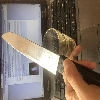

In [44]:
img = image.load_img('D:/python/Project0-Python-MachineLearning/Lesson108-knife/IMG_7920.jpg',target_size=(100,100))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

print(classes)
img

[[0.9945714]]


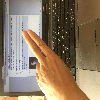

In [45]:
img1 = image.load_img('D:/python/Project0-Python-MachineLearning/Lesson108-knife/IMG_7921.jpg',target_size=(100,100))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1,axis=0)
img_data1 = preprocess_input(x1)
classes = model.predict(img_data1)

print(classes)
img1